## **Seguros medicos**
Regressão Linear com Deep Learning

### **Importação das bibliotecas e carregamento dos dados**

In [5]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import scipy.stats as stats
import statsmodels
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

plt.style.use('dark_background')

warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/diogomonteiro/insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

### **Análise Exploratória Geral**

**Nessa parte vamos análisar:** 

1 - Análisar todas as variáveis para entender os dados.

2 - Análisar as quantidade linhas, colunas, tipos das colunas, dados nulos, quartis e etc...

Função para análisar as colunas

___________________________________________________________
age
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


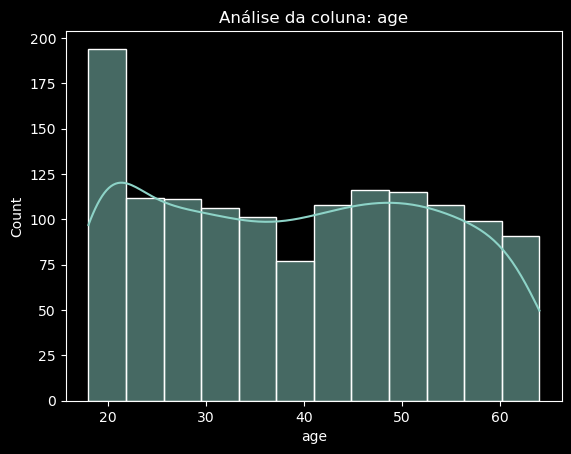

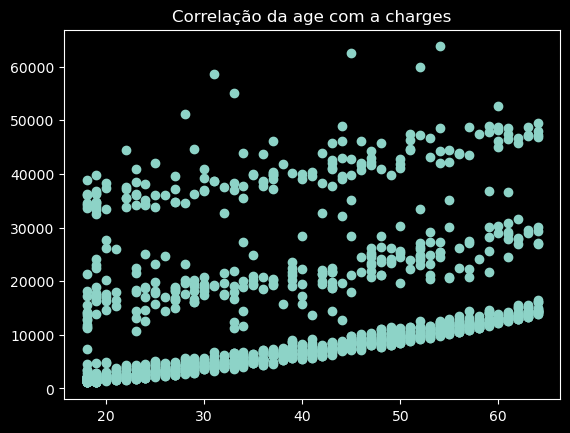

___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 548
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


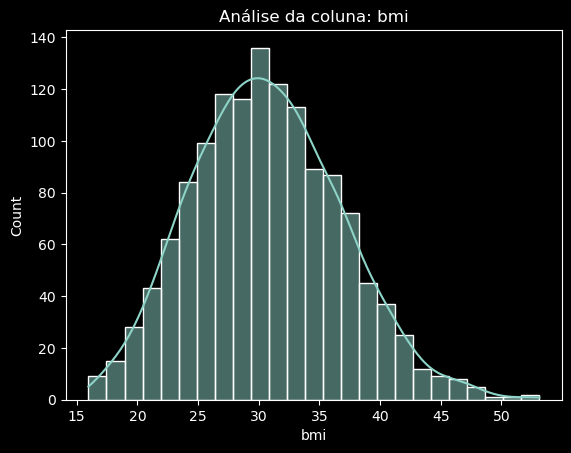

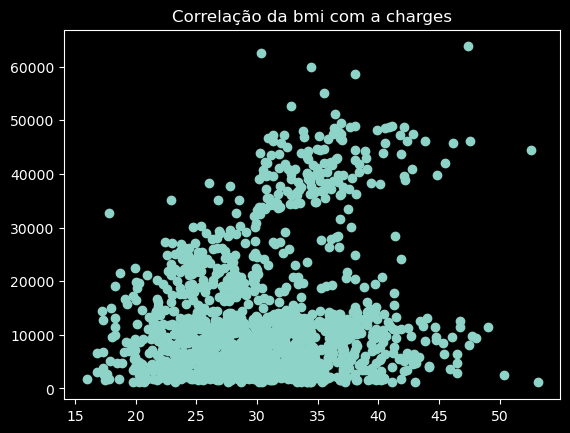

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


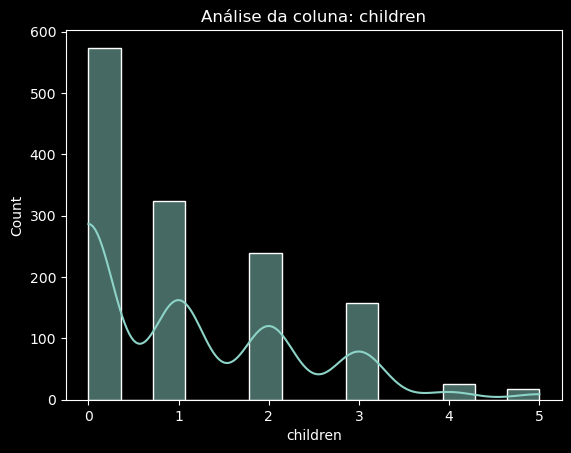

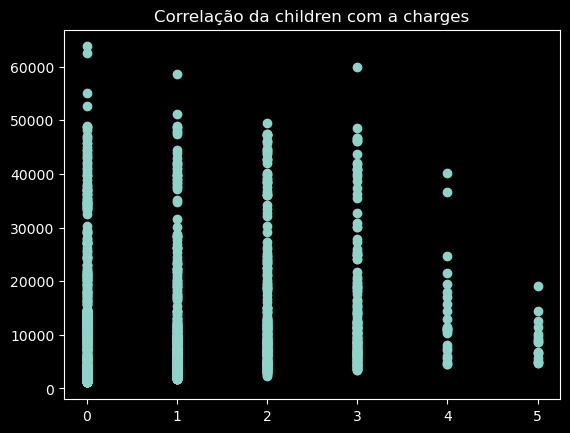

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
region
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1337
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


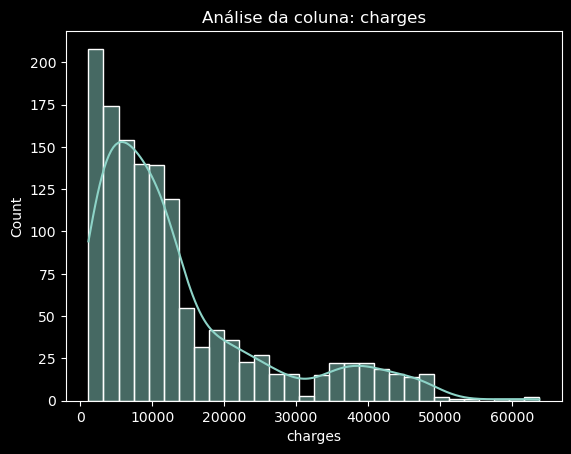

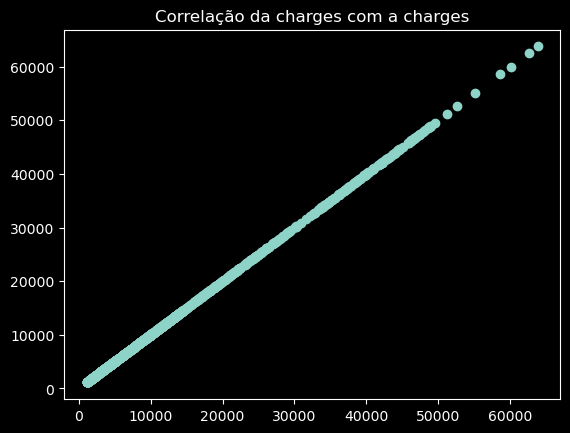

___________________________________________________________


In [8]:
def analise(df):
    
    for i in df.columns: 
        
        if df[i].dtypes == 'int64' or df[i].dtypes == 'float64': 

            print(f'___________________________________________________________')
            print(f'{df[i].name}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de linha da coluna: {df[i].shape}')
            print(f'-----------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print(f'-----------------------------------------------------------')
            print(f'Dados unicos: {df[i].nunique()}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de dados nulos: {df[i].isnull().sum()}')
            print(f'___________________________________________________________')
            print(f'Análsando os quartis: \n\n{df[i].describe()}')
            print(f'___________________________________________________________')
            fig = px.box(df[i], title=f"Análise da coluna: {df[i].name}",template= "plotly_dark")
            fig.show()
            print('')
            plt.title(f'Análise da coluna: {df[i].name}')
            sns.histplot(df[i], kde= 'charges')
            plt.show()             
            print(f'')
            plt.title(f'Correlação da {df[i].name} com a charges')
            plt.scatter(df[i], df.charges)
            plt.show()             
            print(f'___________________________________________________________')

        else:
            print(f'___________________________________________________________')
            print(f'{df[i].name}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de linha da coluna: {df[i].shape}')
            print(f'-----------------------------------------------------------')
            print(f'Tipo da coluna: {df[i].dtypes}')
            print(f'-----------------------------------------------------------')
            print(f'Dados unicos: {df[i].nunique()}')
            print(f'-----------------------------------------------------------')
            print(f'Quantidade de dados nulos: {df[i].isnull().sum()}')
            print(f'___________________________________________________________')
            fig1 = px.histogram(df[i],title=f"Análise da coluna: {df[i].name}",template= 'plotly_dark')
            fig1.show()
            print(f'___________________________________________________________')

analise(df)   

### **Resposta:**

**Na análise geral observamos que:**

1 - tem outliers nas colunas BMI e no charges.

2 - vamos fazer algums análise nessas colunas, entender se bmi afeta o preço do seguro ou se e outra coluna.

----

**Análise das colunas bmi e charges**

In [11]:
imc_alto = df.loc[df['bmi'] >= 25]
imc_alto.loc[imc_alto['charges'] > 25000.00000]

age     sex     bmi  children smoker     region      charges
9      60  female  25.840         0     no  northwest  28923.13692
11     62  female  26.290         0    yes  southeast  27808.72510
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
...   ...     ...     ...       ...    ...        ...          ...
1308   25  female  30.200         0    yes  southwest  33900.65300
1313   19  female  34.700         2    yes  southwest  36397.57600
1321   62    male  26.695         0    yes  northeast  28101.33305
1323   42  female  40.370         2    yes  southeast  43896.37630
1337   61  female  29.070         0    yes  northwest  29141.36030

[190 rows x 7 columns]

___________________________________________________________
age
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1093.000000
mean       39.841720
std        14.075464
min        18.000000
25%        27.000000
50%        40.000000
75%        52.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


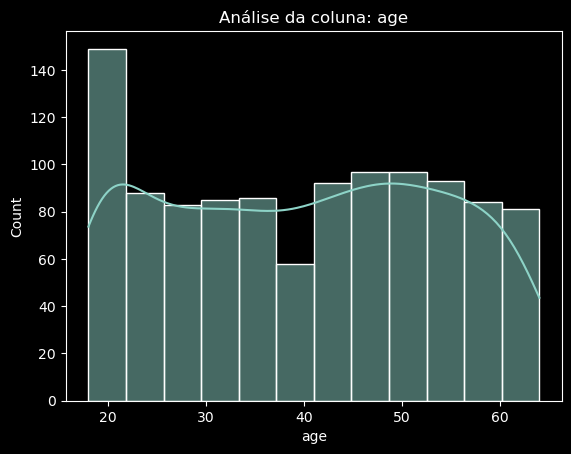

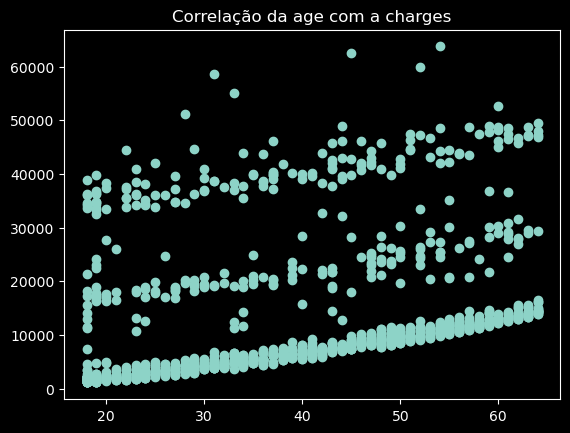

___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 420
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1093.000000
mean       32.559625
std         4.988743
min        25.000000
25%        28.595000
50%        31.900000
75%        35.815000
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


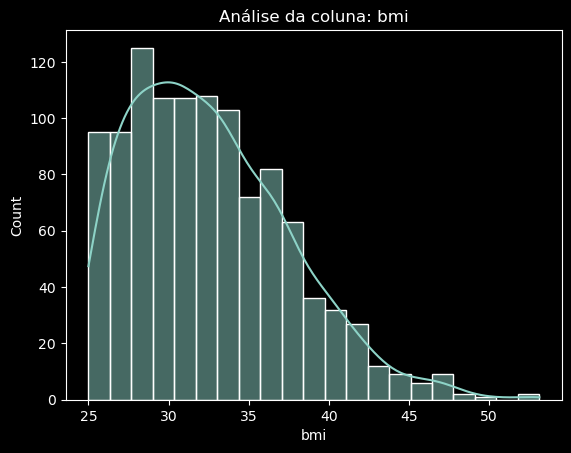

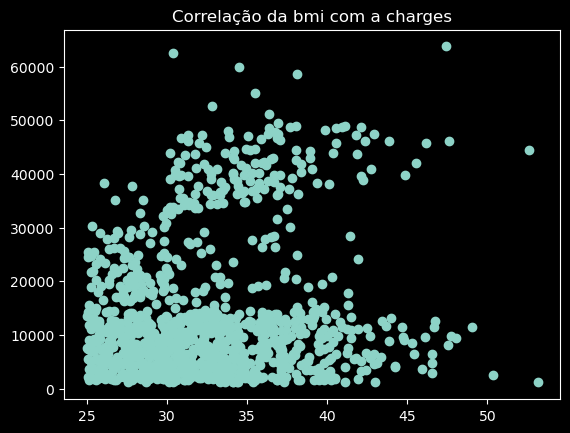

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1093.000000
mean        1.088747
std         1.198439
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


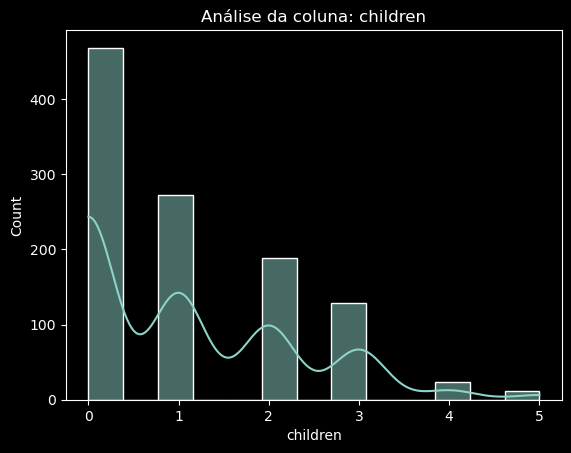

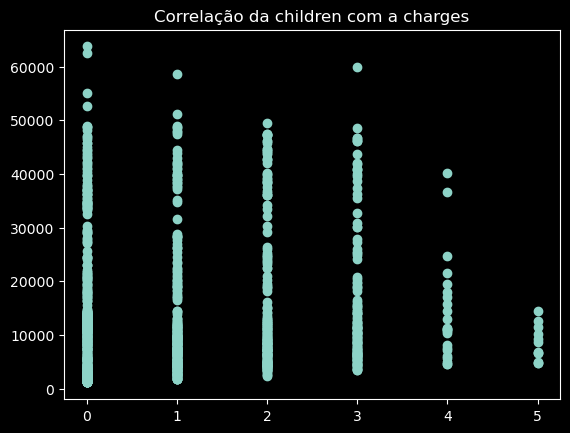

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
region
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Quantidade de linha da coluna: (1093,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1092
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1093.000000
mean     13940.237872
std      12824.401478
min       1131.506600
25%       4889.999500
50%       9563.029000
75%      17560.379750
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


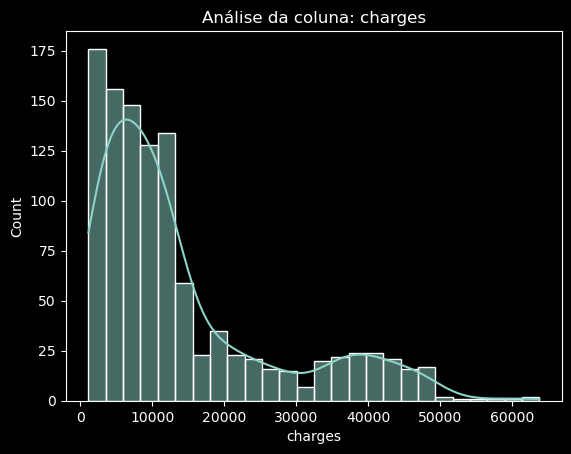

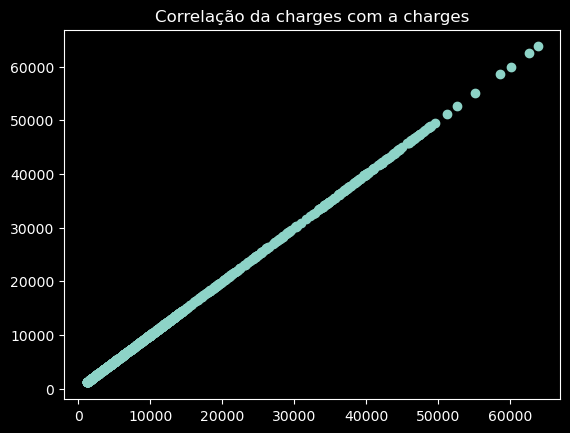

___________________________________________________________


In [12]:
analise(imc_alto)

In [13]:
imc_normal = df.loc[df['bmi'] <= 24.99]
imc_normal.loc[imc_normal['charges'] > 25000.00000]

age     sex     bmi  children smoker     region      charges
62     64    male  24.700         1     no  northwest  30166.61817
128    32  female  17.765         2    yes  northwest  32734.18630
140    34    male  22.420         2     no  northeast  27375.90478
219    24  female  23.210         0     no  southeast  25081.76784
607    59  female  23.655         0    yes  northwest  25678.77845
664    64  female  22.990         0    yes  southeast  27037.91410
688    47  female  24.100         1     no  southwest  26236.57997
917    45    male  22.895         0    yes  northeast  35069.37452
1142   52  female  24.860         0     no  southeast  27117.99378
1223   20  female  24.420         0    yes  southeast  26125.67477
1265   64    male  23.760         0    yes  southeast  26926.51440

___________________________________________________________
age
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    245.000000
mean      36.375510
std       13.606811
min       18.000000
25%       24.000000
50%       35.000000
75%       47.000000
max       64.000000
Name: age, dtype: float64
___________________________________________________________


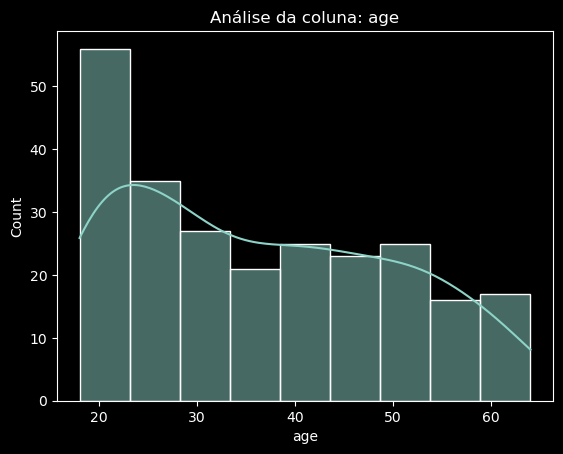

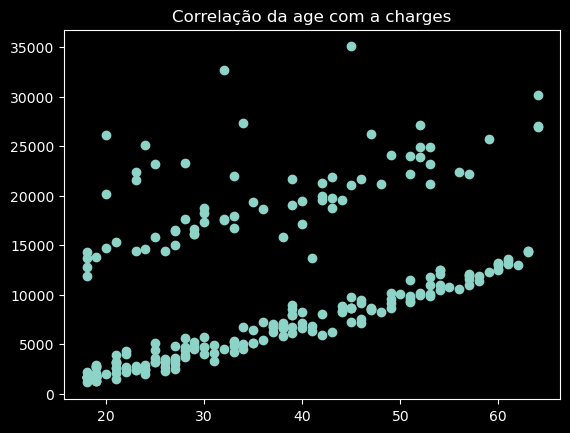

___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 128
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    245.000000
mean      22.203898
std        2.103806
min       15.960000
25%       20.800000
50%       22.705000
75%       23.900000
max       24.985000
Name: bmi, dtype: float64
___________________________________________________________


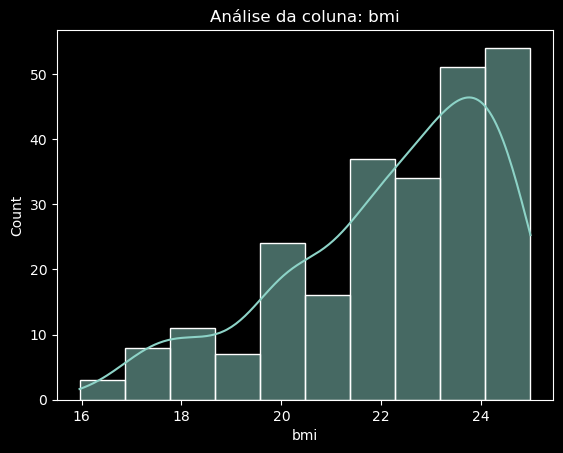

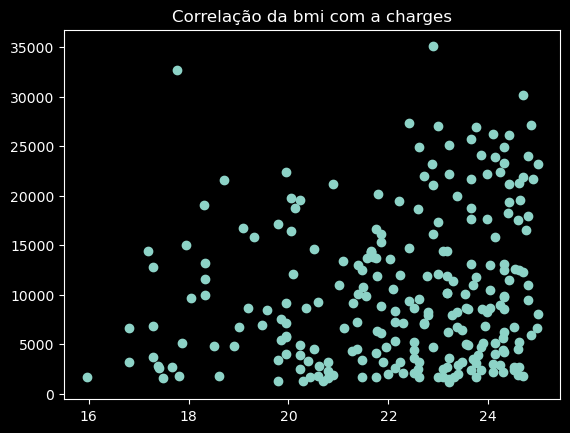

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    245.000000
mean       1.122449
std        1.238598
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64
___________________________________________________________


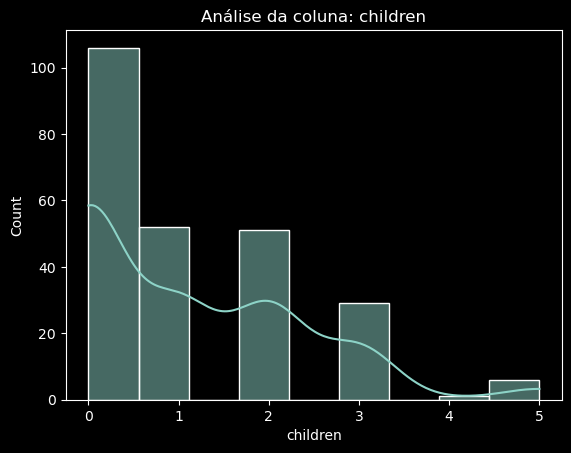

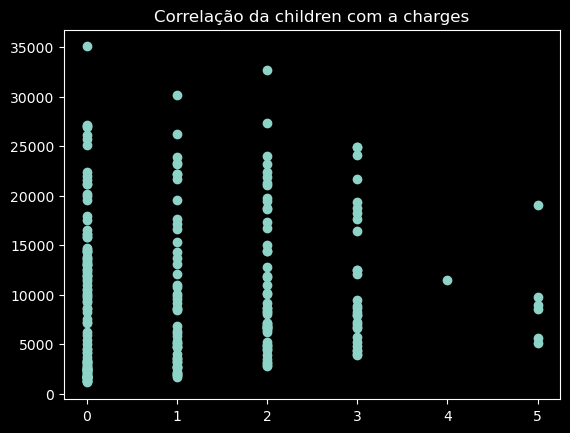

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
region
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: object
-----------------------------------------------------------
Dados unicos: 4
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________


___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Quantidade de linha da coluna: (245,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 245
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count      245.000000
mean     10282.224474
std       7520.485850
min       1121.873900
25%       3861.209650
50%       8582.302300
75%      14571.890800
max      35069.374520
Name: charges, dtype: float64
___________________________________________________________


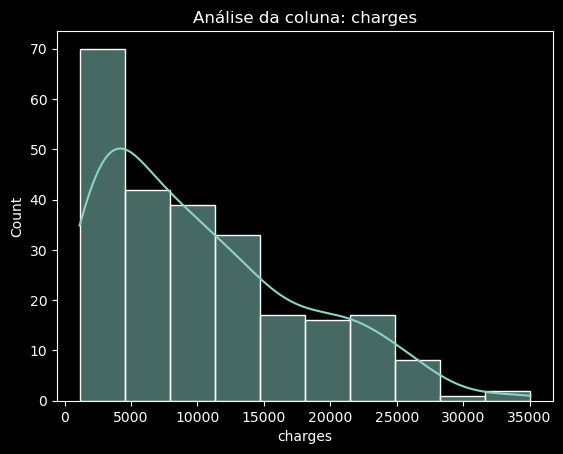

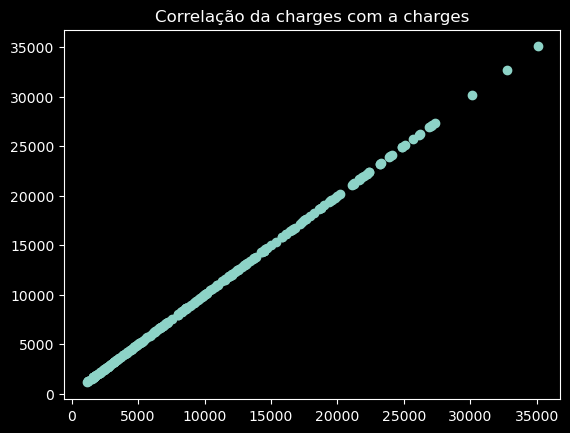

___________________________________________________________


In [14]:
analise(imc_normal)

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
correlação = df[['age', 'bmi', 'children', 'charges']]
round(correlação.corr(),2)

age   bmi  children  charges
age       1.00  0.11      0.04     0.30
bmi       0.11  1.00      0.01     0.20
children  0.04  0.01      1.00     0.07
charges   0.30  0.20      0.07     1.00

### **Resposta:**

**Conseguimos notar que:** 

1 - Temos alguns outliers nas colunas bmi e charges, a coluna bmi (imc) quando esta alta, afeta valor da variável Alvo deixando o valor mais caro.

2 - notamos que a variável smolker também afeta a variável alvo.

-------

### **Transformando os dados categóricos em numéricos** 

**Nesta parte vamos fazer:**

1 - Usar get_dummies para criar novas colunas das variáveis categóricas.

2 - Transformar as novas colunas em numéricas.

In [19]:
df1 = df
df1 = pd.get_dummies(df1, columns=['region'])
df1[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']] = df1[['region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']].astype('int64')
df1

age     sex     bmi  children smoker      charges  region_northeast  \
0      19  female  27.900         0    yes  16884.92400                 0   
1      18    male  33.770         1     no   1725.55230                 0   
2      28    male  33.000         3     no   4449.46200                 0   
3      33    male  22.705         0     no  21984.47061                 0   
4      32    male  28.880         0     no   3866.85520                 0   
...   ...     ...     ...       ...    ...          ...               ...   
1333   50    male  30.970         3     no  10600.54830                 0   
1334   18  female  31.920         0     no   2205.98080                 1   
1335   18  female  36.850         0     no   1629.83350                 0   
1336   21  female  25.800         0     no   2007.94500                 0   
1337   61  female  29.070         0    yes  29141.36030                 0   

      region_northwest  region_southeast  region_southwest  
0                    0                 0                 1  
1                    0                 1                 0  
2                    0                 1                 0  
3                    1                 0                 0  
4                    1                 0                 0  
...                ...               ...               ...  
1333                 1                 0                 0  
1334                 0                 0                 0  
1335                 0                 1                 0  
1336                 0                 0                 1  
1337                 1                 0                 0  

[1338 rows x 10 columns]

In [20]:
df1['sex'].replace({'male': 1,'female': 0},inplace=True)
df1['smoker'].replace({'yes': 1,'no':0}, inplace=True)
df1 = df1[['age', 'sex', 'bmi', 'children', 'smoker',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest','charges']]
df1

age  sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19    0  27.900         0       1                 0                 0   
1      18    1  33.770         1       0                 0                 0   
2      28    1  33.000         3       0                 0                 0   
3      33    1  22.705         0       0                 0                 1   
4      32    1  28.880         0       0                 0                 1   
...   ...  ...     ...       ...     ...               ...               ...   
1333   50    1  30.970         3       0                 0                 1   
1334   18    0  31.920         0       0                 1                 0   
1335   18    0  36.850         0       0                 0                 0   
1336   21    0  25.800         0       0                 0                 0   
1337   61    0  29.070         0       1                 0                 1   

      region_southeast  region_southwest      charges  
0                    0                 1  16884.92400  
1                    1                 0   1725.55230  
2                    1                 0   4449.46200  
3                    0                 0  21984.47061  
4                    0                 0   3866.85520  
...                ...               ...          ...  
1333                 0                 0  10600.54830  
1334                 0                 0   2205.98080  
1335                 1                 0   1629.83350  
1336                 0                 1   2007.94500  
1337                 0                 0  29141.36030  

[1338 rows x 10 columns]

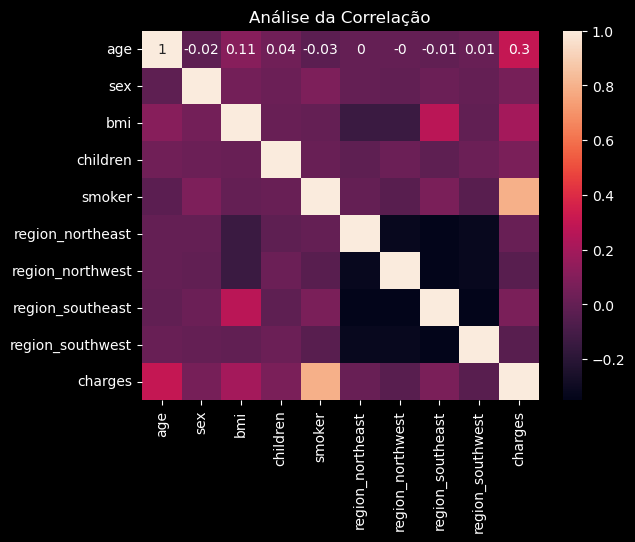

In [21]:
plt.title('Análise da Correlação')
sns.heatmap(round(df1.corr(),2),annot=True);

### **Resposta:**

Depois de transformar a coluna smoker (fumante) de categórica em numérica, vimos que ela tem uma forte correlação psitiva com variável alvo.

-----

### **Análise Estatística**

Nesta parte vamos fazer:

1 - Normal Q-Q plot

2 - vamos criar uma função para rodar uns relatórios de Person Spearman e etc...

___________________________________________________________
age
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 47
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
___________________________________________________________


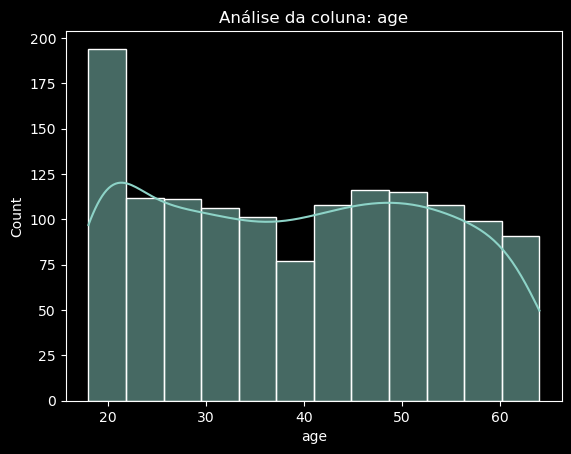

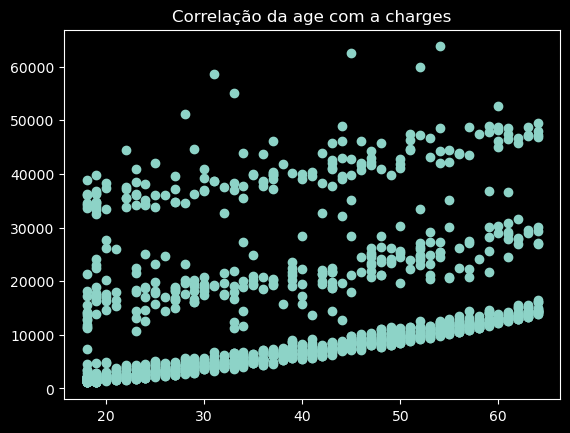

___________________________________________________________
___________________________________________________________
sex
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.505232
std         0.500160
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
___________________________________________________________


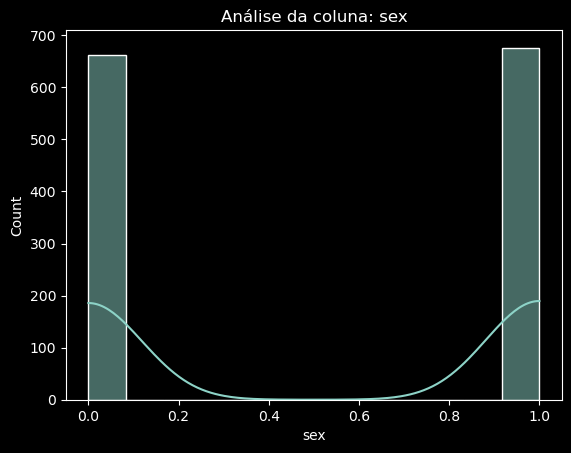

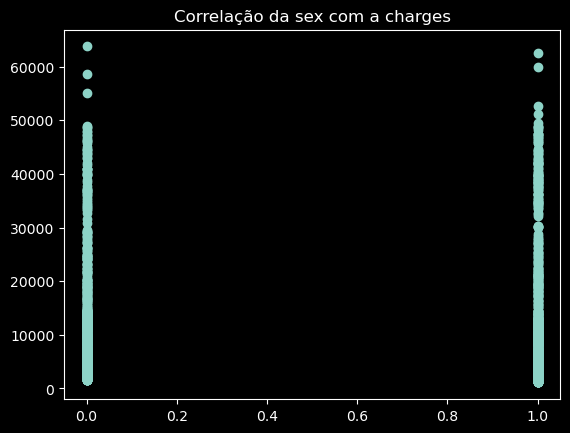

___________________________________________________________
___________________________________________________________
bmi
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 548
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
___________________________________________________________


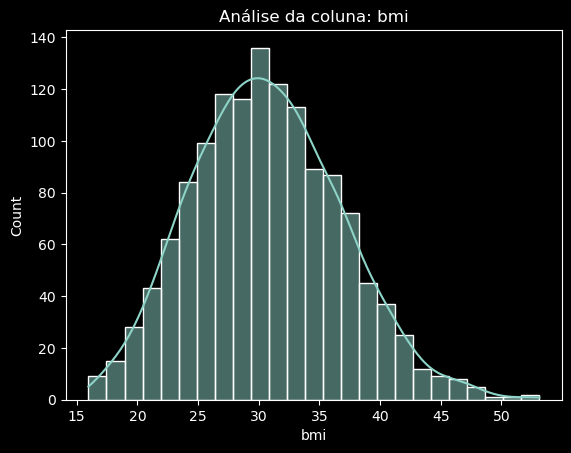

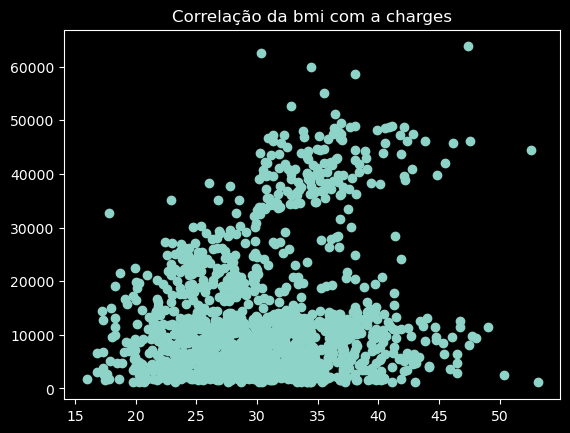

___________________________________________________________
___________________________________________________________
children
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 6
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
___________________________________________________________


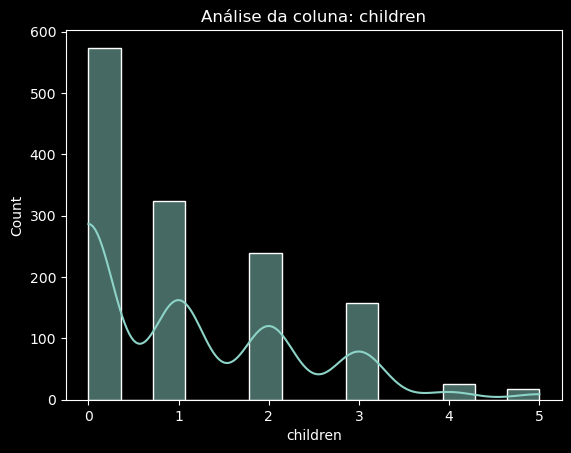

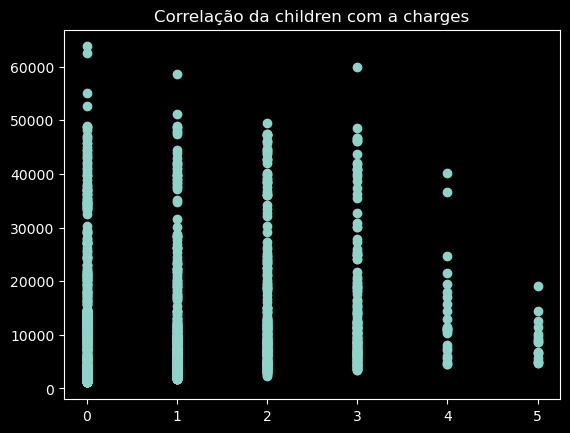

___________________________________________________________
___________________________________________________________
smoker
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker, dtype: float64
___________________________________________________________


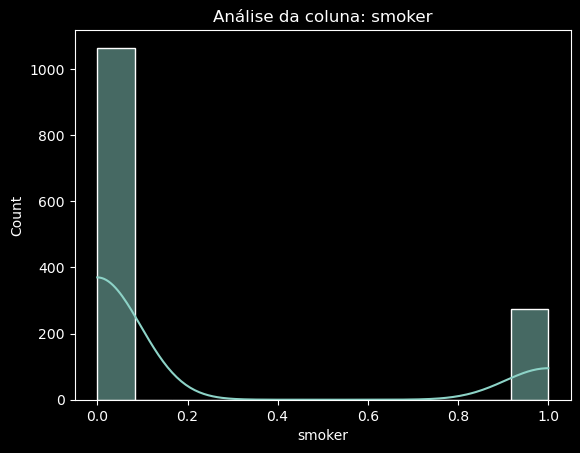

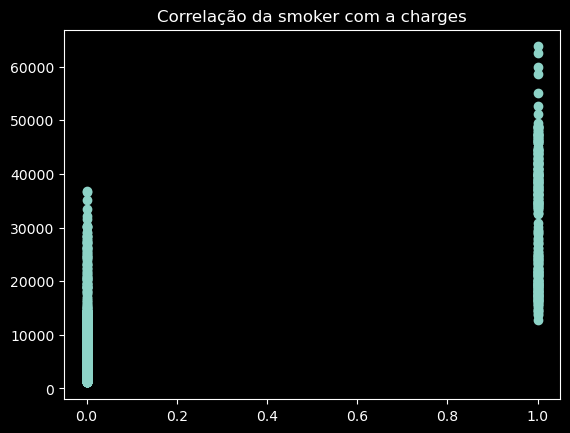

___________________________________________________________
___________________________________________________________
region_northeast
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.242152
std         0.428546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: region_northeast, dtype: float64
___________________________________________________________


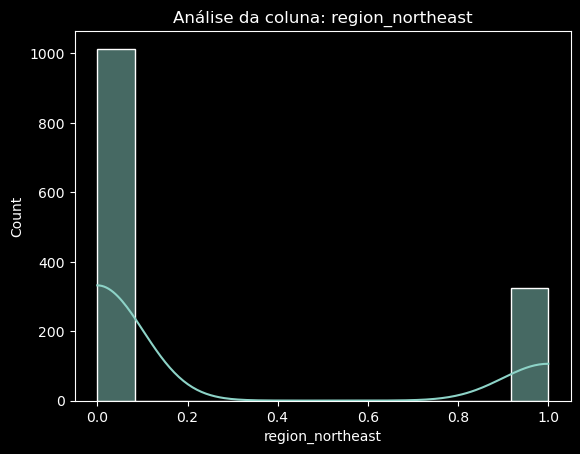

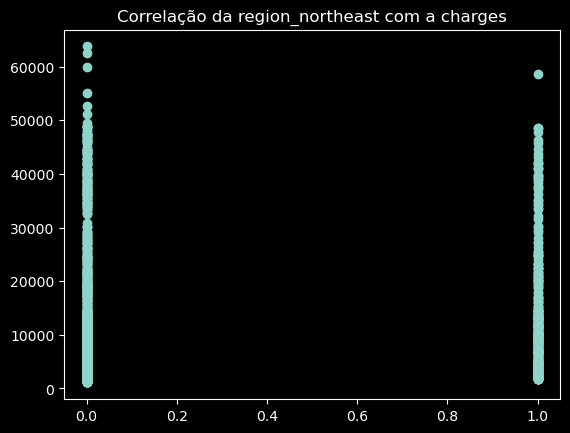

___________________________________________________________
___________________________________________________________
region_northwest
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.242900
std         0.428995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: region_northwest, dtype: float64
___________________________________________________________


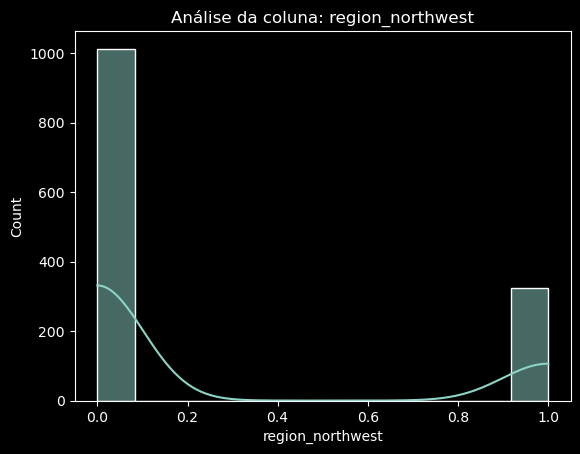

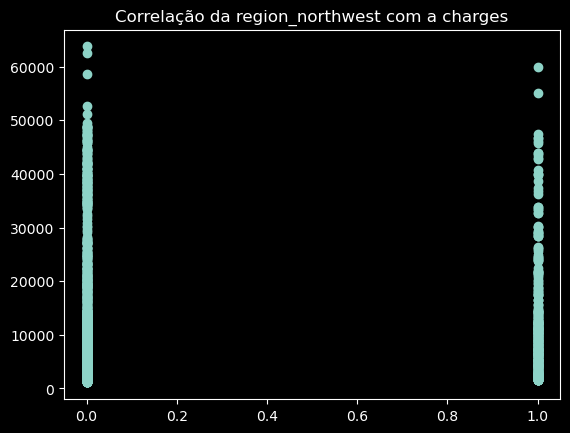

___________________________________________________________
___________________________________________________________
region_southeast
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.272048
std         0.445181
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: region_southeast, dtype: float64
___________________________________________________________


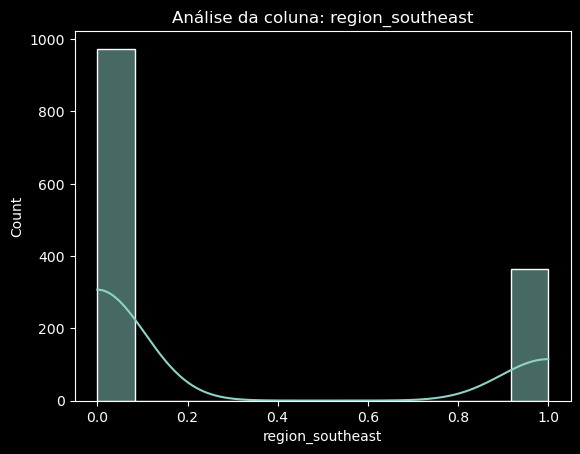

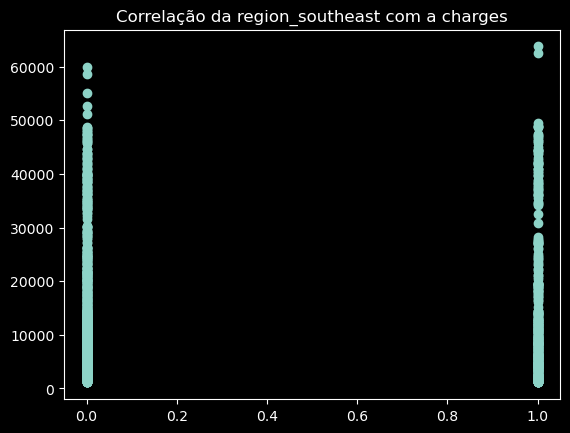

___________________________________________________________
___________________________________________________________
region_southwest
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: int64
-----------------------------------------------------------
Dados unicos: 2
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count    1338.000000
mean        0.242900
std         0.428995
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: region_southwest, dtype: float64
___________________________________________________________


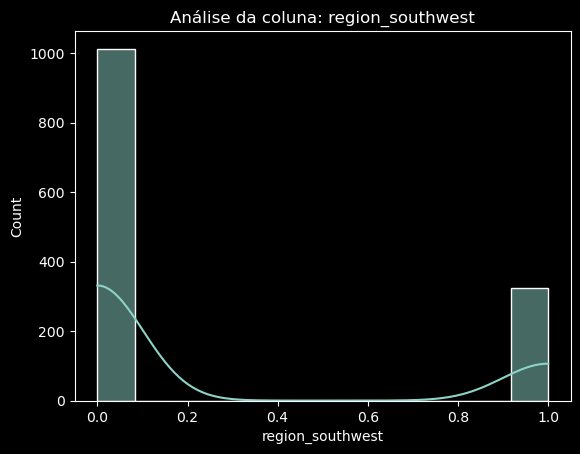

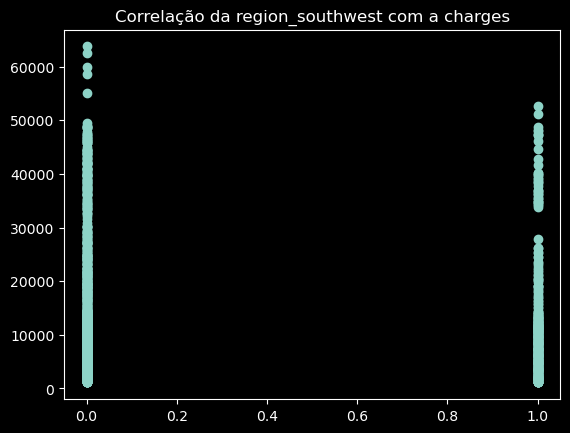

___________________________________________________________
___________________________________________________________
charges
-----------------------------------------------------------
Quantidade de linha da coluna: (1338,)
-----------------------------------------------------------
Tipo da coluna: float64
-----------------------------------------------------------
Dados unicos: 1337
-----------------------------------------------------------
Quantidade de dados nulos: 0
___________________________________________________________
Análsando os quartis: 

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
___________________________________________________________


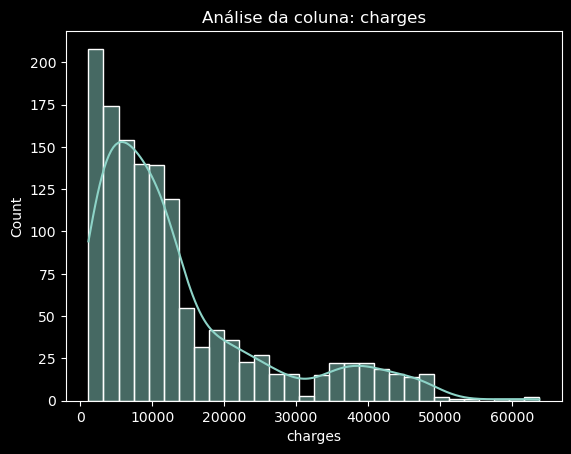

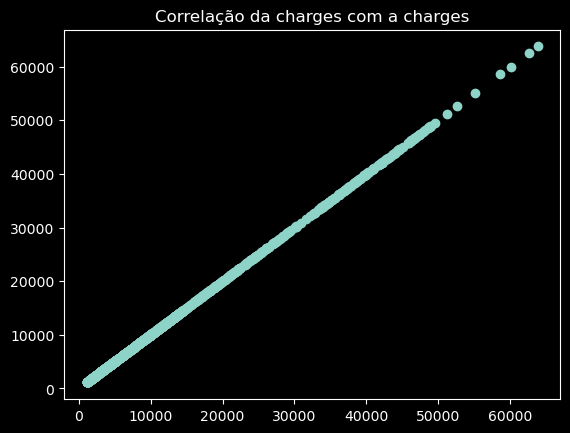

___________________________________________________________


In [24]:
analise(df1)

**Análise da Normalidade**

Gráficos QQ-plot

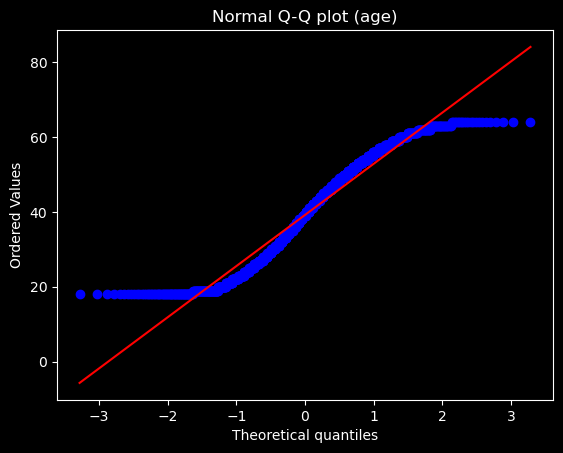

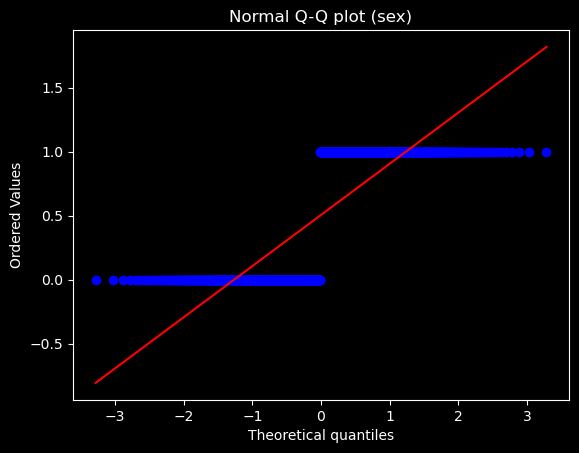

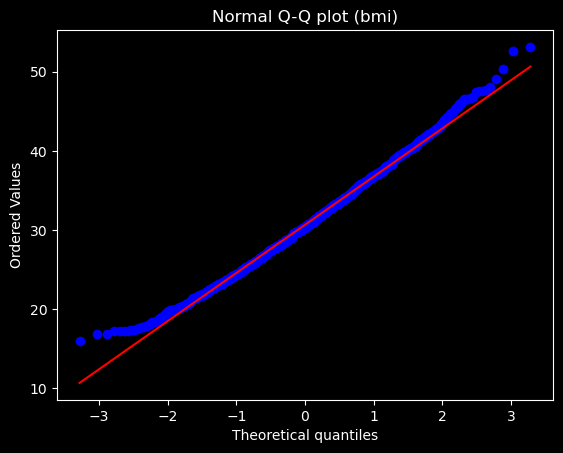

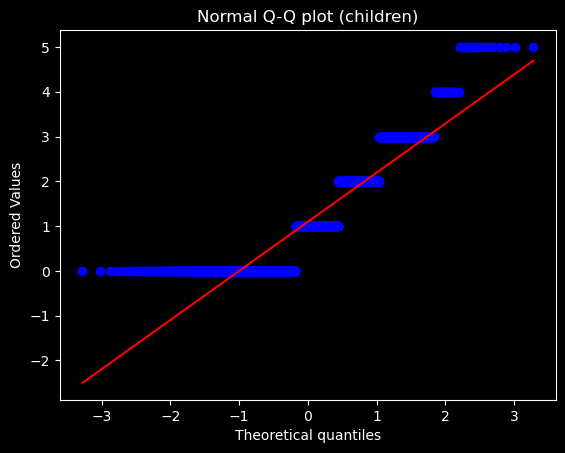

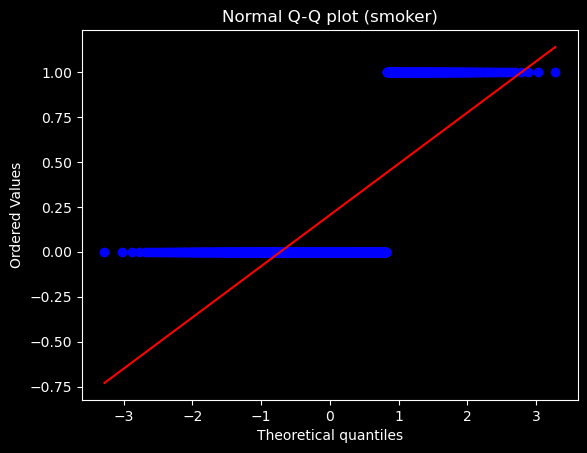

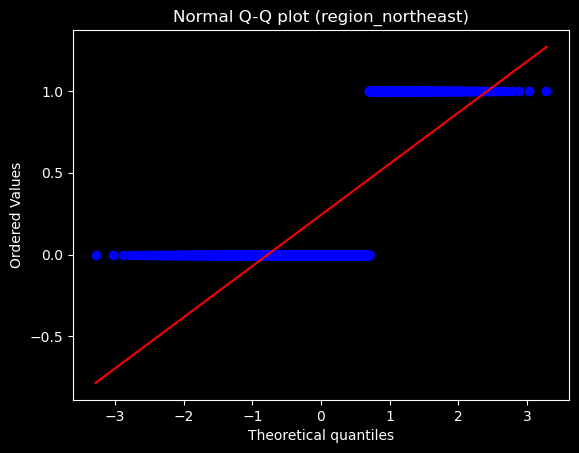

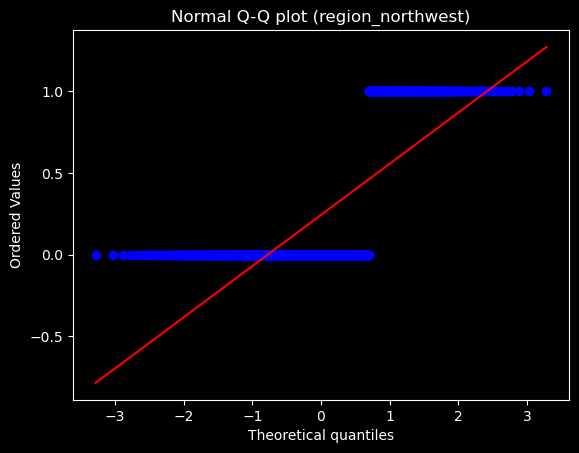

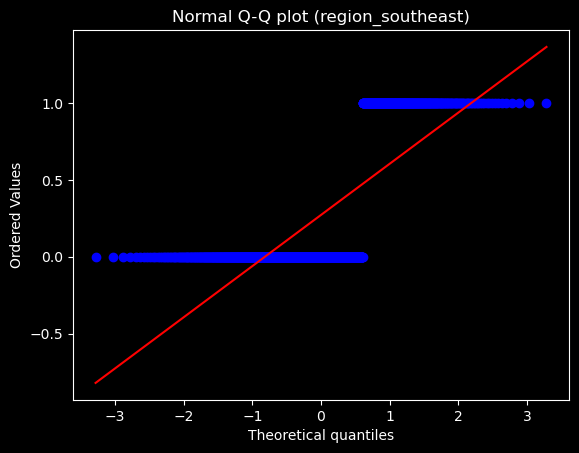

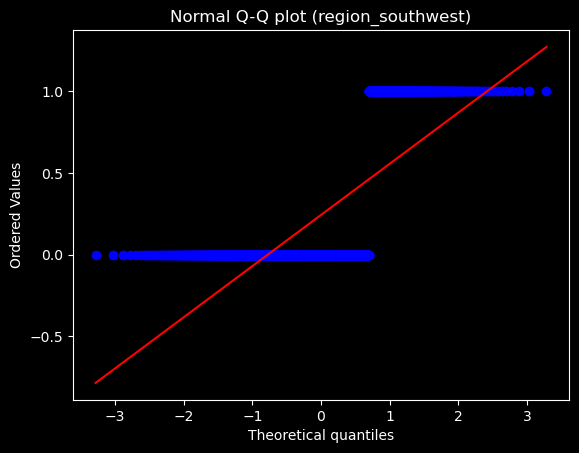

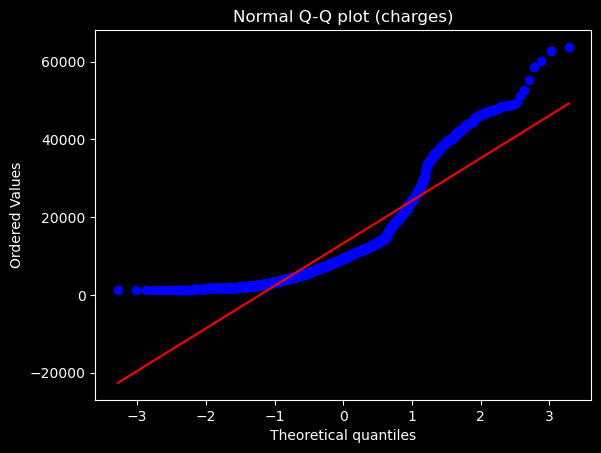

In [26]:
for e in df1.columns:
    stats.probplot(df1[e],dist = 'norm', plot = plt)
    plt.title(f'Normal Q-Q plot ({df1[e].name})')
    plt.show()

**Análise com scipy e statsmodels**

In [90]:
x = df1.drop('charges', axis=1)

def Relatorios_sta(dados):
    for e in dados.columns:
        estatis, p = stats.shapiro(dados[e])

        estatis1,p1 = statsmodels.stats.diagnostic.lilliefors(dados[e], dist = 'norm')

        coef, p2 = stats.pearsonr(df.charges,dados[e])

        coef1, p3 = stats.spearmanr(df.charges,dados[e])

        coef2, p4 = stats.kendalltau(df.charges,dados[e])
        
        print('_______________________________________')
        print(f'charges e {dados[e].name}')
        print('_______________________________________')
        print(f'Estatística do teste: {round(estatis1,2)}')
        print('---------------------------------------')
        print(f'p-valor: {p1}')
        print('---------------------------------------')
        print('PEARSON')
        print('---------------------------------------')
        print(f'Coeficiente de correlação: {coef}')
        print('---------------------------------------')
        print(f'p-valor: {p2}')
        print('---------------------------------------')
        print('SPEARMAN')
        print('---------------------------------------')
        print(f'Coeficiente de correlação: {round(coef1,2)}')
        print('---------------------------------------')
        print(f'p-valor: {p3}')
        print('---------------------------------------')
        print('KENDALL')
        print('---------------------------------------')
        print(f'Coeficiente de correlação: {round(coef2,2)}')
        print('---------------------------------------')
        print(f'p-valor: {p4}')
        print('---------------------------------------')


Relatorios_sta(x)

_______________________________________
charges e age
_______________________________________
Estatística do teste: 0.08
---------------------------------------
p-valor: 0.0009999999999998899
---------------------------------------
PEARSON
---------------------------------------
Coeficiente de correlação: 0.29900819333064765
---------------------------------------
p-valor: 4.886693331718192e-29
---------------------------------------
SPEARMAN
---------------------------------------
Coeficiente de correlação: 0.53
---------------------------------------
p-valor: 1.1306920278035412e-99
---------------------------------------
KENDALL
---------------------------------------
Coeficiente de correlação: 0.48
---------------------------------------
p-valor: 2.5890786414449767e-146
---------------------------------------
_______________________________________
charges e sex
_______________________________________
Estatística do teste: 0.34
---------------------------------------
p-valor: 0.0009

In [29]:
df1.corr(method='pearson')

age       sex       bmi  children    smoker  \
age               1.000000 -0.020856  0.109272  0.042469 -0.025019   
sex              -0.020856  1.000000  0.046371  0.017163  0.076185   
bmi               0.109272  0.046371  1.000000  0.012759  0.003750   
children          0.042469  0.017163  0.012759  1.000000  0.007673   
smoker           -0.025019  0.076185  0.003750  0.007673  1.000000   
region_northeast  0.002475 -0.002425 -0.138156 -0.022808  0.002811   
region_northwest -0.000407 -0.011156 -0.135996  0.024806 -0.036945   
region_southeast -0.011642  0.017117  0.270025 -0.023066  0.068498   
region_southwest  0.010016 -0.004184 -0.006205  0.021914 -0.036945   
charges           0.299008  0.057292  0.198341  0.067998  0.787251   

                  region_northeast  region_northwest  region_southeast  \
age                       0.002475         -0.000407         -0.011642   
sex                      -0.002425         -0.011156          0.017117   
bmi                      -0.138156         -0.135996          0.270025   
children                 -0.022808          0.024806         -0.023066   
smoker                    0.002811         -0.036945          0.068498   
region_northeast          1.000000         -0.320177         -0.345561   
region_northwest         -0.320177          1.000000         -0.346265   
region_southeast         -0.345561         -0.346265          1.000000   
region_southwest         -0.320177         -0.320829         -0.346265   
charges                   0.006349         -0.039905          0.073982   

                  region_southwest   charges  
age                       0.010016  0.299008  
sex                      -0.004184  0.057292  
bmi                      -0.006205  0.198341  
children                  0.021914  0.067998  
smoker                   -0.036945  0.787251  
region_northeast         -0.320177  0.006349  
region_northwest         -0.320829 -0.039905  
region_southeast         -0.346265  0.073982  
region_southwest          1.000000 -0.043210  
charges                  -0.043210  1.000000

In [30]:
df1.corr(method='spearman')

age       sex       bmi  children    smoker  \
age               1.000000 -0.020809  0.107736  0.056992 -0.025210   
sex              -0.020809  1.000000  0.044802  0.015589  0.076185   
bmi               0.107736  0.044802  1.000000  0.015607  0.002203   
children          0.056992  0.015589  0.015607  1.000000  0.016583   
smoker           -0.025210  0.076185  0.002203  0.016583  1.000000   
region_northeast -0.000149 -0.002425 -0.133115 -0.025690  0.002811   
region_northwest  0.002683 -0.011156 -0.127168  0.034465 -0.036945   
region_southeast -0.015273  0.017117  0.249037 -0.019531  0.068498   
region_southwest  0.013315 -0.004184  0.001710  0.011466 -0.036945   
charges           0.534392  0.009490  0.119396  0.133339  0.663460   

                  region_northeast  region_northwest  region_southeast  \
age                      -0.000149          0.002683         -0.015273   
sex                      -0.002425         -0.011156          0.017117   
bmi                      -0.133115         -0.127168          0.249037   
children                 -0.025690          0.034465         -0.019531   
smoker                    0.002811         -0.036945          0.068498   
region_northeast          1.000000         -0.320177         -0.345561   
region_northwest         -0.320177          1.000000         -0.346265   
region_southeast         -0.345561         -0.346265          1.000000   
region_southwest         -0.320177         -0.320829         -0.346265   
charges                   0.046109         -0.021634          0.017275   

                  region_southwest   charges  
age                       0.013315  0.534392  
sex                      -0.004184  0.009490  
bmi                       0.001710  0.119396  
children                  0.011466  0.133339  
smoker                   -0.036945  0.663460  
region_northeast         -0.320177  0.046109  
region_northwest         -0.320829 -0.021634  
region_southeast         -0.346265  0.017275  
region_southwest          1.000000 -0.042354  
charges                  -0.042354  1.000000

### **Resposta:**

Pelas as análises que fizemos as variáveis idade e fumante tem correlação com variável alvo.


-----

### **Separando os dados de treino e teste**

**Nesta parte vamos fazer:**

1 - importar a biblioteca sklearn para separar os dados de treino e teste.

2 - Usar Sklearn StandardScaler para fazer padronização.

In [33]:
df1.head(3)

age  sex    bmi  children  smoker  region_northeast  region_northwest  \
0   19    0  27.90         0       1                 0                 0   
1   18    1  33.77         1       0                 0                 0   
2   28    1  33.00         3       0                 0                 0   

   region_southeast  region_southwest     charges  
0                 0                 1  16884.9240  
1                 1                 0   1725.5523  
2                 1                 0   4449.4620

In [34]:
x = df1.iloc[:,0:9].values
x

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]])

In [35]:
y = df1.iloc[:,9].values
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [36]:
scaler = StandardScaler().fit_transform(x)
scaler_x = pd.DataFrame(scaler)

In [37]:
scaler_x

0         1         2         3         4         5         6  \
0    -1.438764 -1.010519 -0.453320 -0.908614  1.970587 -0.565267 -0.566418   
1    -1.509965  0.989591  0.509621 -0.078767 -0.507463 -0.565267 -0.566418   
2    -0.797954  0.989591  0.383307  1.580926 -0.507463 -0.565267 -0.566418   
3    -0.441948  0.989591 -1.305531 -0.908614 -0.507463 -0.565267  1.765481   
4    -0.513149  0.989591 -0.292556 -0.908614 -0.507463 -0.565267  1.765481   
...        ...       ...       ...       ...       ...       ...       ...   
1333  0.768473  0.989591  0.050297  1.580926 -0.507463 -0.565267  1.765481   
1334 -1.509965 -1.010519  0.206139 -0.908614 -0.507463  1.769076 -0.566418   
1335 -1.509965 -1.010519  1.014878 -0.908614 -0.507463 -0.565267 -0.566418   
1336 -1.296362 -1.010519 -0.797813 -0.908614 -0.507463 -0.565267 -0.566418   
1337  1.551686 -1.010519 -0.261388 -0.908614  1.970587 -0.565267  1.765481   

             7         8  
0    -0.611324  1.765481  
1     1.635795 -0.566418  
2     1.635795 -0.566418  
3    -0.611324 -0.566418  
4    -0.611324 -0.566418  
...        ...       ...  
1333 -0.611324 -0.566418  
1334 -0.611324 -0.566418  
1335  1.635795 -0.566418  
1336 -0.611324  1.765481  
1337 -0.611324 -0.566418  

[1338 rows x 9 columns]

In [38]:
x_treino,x_teste,y_treino,y_teste = train_test_split(scaler_x,y,test_size= 0.3, random_state=0)

In [39]:
x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape

((936, 9), (402, 9), (936,), (402,))

### **Criando os modelos de redes neurais para Regressão Linear**

**Nesta parte vamos fazer:** 

1 - Criar uma classe para os modelos.

2 - treinar, testar e  fazer validação cruzada dos modelos.
 

In [88]:
redes = {
    'MLPR': MLPRegressor(hidden_layer_sizes=(90),activation='relu',solver = 'lbfgs', random_state= 0)
    
}

class Relatorio_rede():
    
    def __init__(self,redes,x_treino,x_teste,y_treino,y_teste):
        self.redes = redes
        self.x_treino = x_treino
        self.x_teste = x_teste
        self.y_treino = y_treino
        self.y_teste = y_teste
        self.redes_score = []

    def treino(self,redes):

        for name, rede in self.redes.items():
            
            rede_neural = rede.fit(self.x_treino,self.y_treino)

            previsoes = rede.predict(self.x_teste)

            kfold = KFold(n_splits=12, shuffle=True, random_state=6)

            resultado = cross_val_score(rede,scaler_x,y,cv = kfold)          
    
            print('____________________________________________________')
            print(f'TREINO')
            print('----------------------------------------------------')
            print(f'Quantidade de camada: {rede_neural.n_layers_}')
            print('----------------------------------------------------')
            print(f'Score: {round(rede_neural.score(self.x_treino,self.y_treino)*100,2)}%')
            print('----------------------------------------------------')
            print('____________________________________________________')
            print('TESTE')
            print('----------------------------------------------------')
            print(f'Quantidade de camada: {rede_neural.n_layers_}')
            print('----------------------------------------------------')
            print(f'Score: {round(rede_neural.score(self.x_teste,self.y_teste)*100,2)}%')
            print('----------------------------------------------------')
            print(f'MÉTRICAS')
            print('----------------------------------------------------')
            print(f'Erro absoluto médio: {round(mean_absolute_error(self.y_teste,previsoes),2)}')
            print('----------------------------------------------------')
            print(f'Raiz do erro quadrático médio: {round(np.sqrt(mean_squared_error(self.y_teste,previsoes)),2)}')
            print('----------------------------------------------------')
            print(f'Acurácia média: {round(resultado.mean(),2)*100}%')
            print('----------------------------------------------------')


relatorio = Relatorio_rede(redes,x_treino,x_teste,y_treino,y_teste)
relatorio.treino(redes['MLPR'])

____________________________________________________
TREINO
----------------------------------------------------
Quantidade de camada: 3
----------------------------------------------------
Score: 90.73%
----------------------------------------------------
____________________________________________________
TESTE
----------------------------------------------------
Quantidade de camada: 3
----------------------------------------------------
Score: 80.57%
----------------------------------------------------
MÉTRICAS
----------------------------------------------------
Erro absoluto médio: 3626.98
----------------------------------------------------
Raiz do erro quadrático médio: 5565.87
----------------------------------------------------
Acurácia média: 81.0%
----------------------------------------------------


In [42]:
rede = MLPRegressor(hidden_layer_sizes=(90),activation='relu',solver = 'lbfgs', random_state= 0)
rede.fit(x_treino,y_treino)
previsoes = rede.predict(x_teste)
df2 = pd.DataFrame(x_teste, columns=['feature1', 'feature2'])
df2['actual'] = y_teste
df2['previsões'] = previsoes
df2 = df2.drop(df2[['feature1', 'feature2']],axis=1)
df2.head(20)

actual     previsões
578    9724.53000   8634.173558
610    8547.69130   8775.645239
569   45702.02235  52984.385799
1034  12950.07120  12581.226817
198    9644.25250  10108.499070
981    4500.33925    619.514637
31     2198.18985   4364.521089
1256  11436.73815  13133.275597
1219   7537.16390  10502.140097
1320   5425.02335  11941.852587
613    6753.03800  10429.808094
1107  10493.94580  13379.407646
1263   7337.74800   9276.491177
406    4185.09790  13099.640100
795   18310.74200  18797.450967
970   10702.64240  13271.858060
824   12523.60480  14262.995373
141    3490.54910  10451.959751
1173   6457.84340   8758.533154
1042  33475.81715  26235.565716

### **Resposta:**

Com a rede neural chegamos na melhor previsão dela 81% na validação cruzada.